In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

De priemras identificamos que hay un problema en cuanto a rango de las variables, debido a que hay variables que tienen un rango mas grande,entonces
puede ser que tengamos que normalizar los datos.

In [3]:
df = pd.read_csv('/USERS/ADMIN/CE/SAA/RANDOM_FORESTS/random2/house_price_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


Square_Footage: Metros Cuadrados
Num_Bedrooms: Número de Habitaciones
Num_Bathrooms: Número de Baños
Year_Built: Año de Construcción
Lot_Size: Tamaño del Terreno
Garage_Size: Tamaño del Garaje
Neighborhood_Quality: Calidad del Vecindario
House_Price: Precio de la Casa

In [39]:
df.head(10)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
6,3671,1,2,2012,4.911960,0,1,8.144279e+05
7,3419,1,1,1972,2.805281,1,1,7.034131e+05
8,630,3,3,1997,1.014286,1,8,1.738750e+05
9,2185,4,2,1981,3.941604,2,5,5.041765e+05


In [40]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [42]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [43]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [44]:
df.nunique()

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

In [45]:
df.duplicated().sum()

0

Our Dataset has no missing/NA values which is great!, Let's keep going!

In [46]:
df['House_Price'].max()

1108236.8362913695

In [47]:
df['House_Price'].mean()

618861.0186467685

In [48]:
df['House_Price'].median()

628267.2911288175

In [49]:
df['House_Price'].min()

111626.85342361582

# **1. Librerias** <a class="anchor" id="1"></a>

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# **2. Defino variables x, y** <a class="anchor" id="1"></a>

In [6]:
features = df.drop(columns=['House_Price'])
target = df['House_Price']

# **3. Divido datos en train y test** <a class="anchor" id="1"></a>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=29)

# *4. Estandarización Datos** <a class="anchor" id="1"></a>

In [10]:
#defino un nombre con la funcion de estandarización
scaler = StandardScaler()

In [11]:
#importante la estandarizacion es para ayudar al modelo a que las variables tengan el mismo peso y no coja de referencia que por tener mas rango es mas importante
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *5. Defino Modelo y Parametros** <a class="anchor" id="1"></a>

In [14]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=29)


# *6. Train modelo** <a class="anchor" id="1"></a>

In [15]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=29)

# *7. Predición modelo ** <a class="anchor" id="1"></a>

In [16]:
rf_model_pred = rf_model.predict(X_test_scaled)
rf_model_pred

array([ 627316.86060783, 1051975.84702355,  650423.19935464,
        452785.16798388,  209020.11817627,  319752.17367097,
        756649.380321  ,  848068.20465651,  532462.61012472,
        907357.84861296,  488267.65701318,  526310.30377939,
        907667.91182658,  421453.85811891,  231080.44137116,
        721900.56452481,  760891.73382102, 1026629.53411555,
        903137.76548124,  328136.74422408,  998386.70766946,
        526082.35548161,  818369.20754371,  183372.9444294 ,
        653156.21543337, 1041999.38528587,  780461.87419565,
        353558.63925849,  816750.45732396,  443563.40879983,
        376478.70826643,  721375.75042455,  919663.72630101,
        676447.67289353,  995553.82261463,  612116.93927863,
        817011.63960934,  621227.59892963,  233158.26311899,
        676461.34268579, 1020866.02571626,  850868.48158415,
        338168.54699496,  804076.66037784,  332933.80728499,
        741848.98633735,  859386.34862645,  599209.33320734,
        962492.05998204,

In [19]:
y_test

795    6.911139e+05
973    1.034380e+06
794    6.415270e+05
694    4.621857e+05
587    1.460204e+05
           ...     
374    7.208837e+05
137    4.920183e+05
970    1.009807e+06
989    4.607412e+05
195    8.451416e+05
Name: House_Price, Length: 200, dtype: float64

# *8.Metricas ** <a class="anchor" id="1"></a>

In [58]:
mae = mean_absolute_error(y_test, rf_model_pred)
r2_score = r2_score(y_test, rf_model_pred)

mae, r2_score

(16775.02881318955, 0.9927807567703572)

Hence, our model is efficient as it can account for **99.28%** of the variance in the target variable based on the features of the dataset

En este caso, el Error Absoluto Medio (MAE) de aproximadamente 16,775 en un contexto donde el precio mínimo de las casas es 111,626.85 (lo que hace que el MAE sea alrededor del 15% del precio mínimo) indica que el modelo es relativamente preciso. Este MAE representa, en promedio, cuánto se desvía la predicción del modelo respecto al valor real.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13560\1251755077.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette = 'viridis')


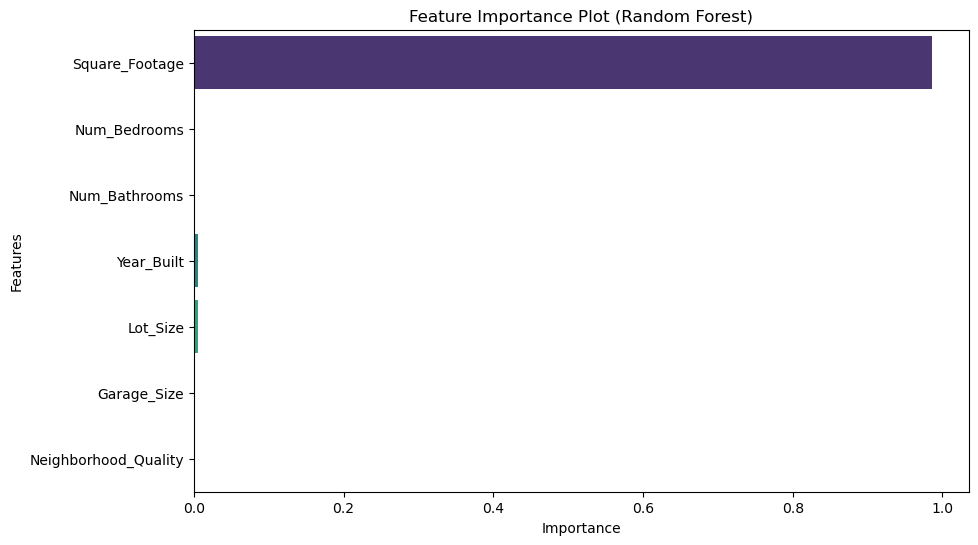

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt 

importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette = 'viridis')
plt.title('Feature Importance Plot (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The feature importance plot as shown above shows that Square_Footage is the most significant factor used for determining the House Price using the Random Forest Model.

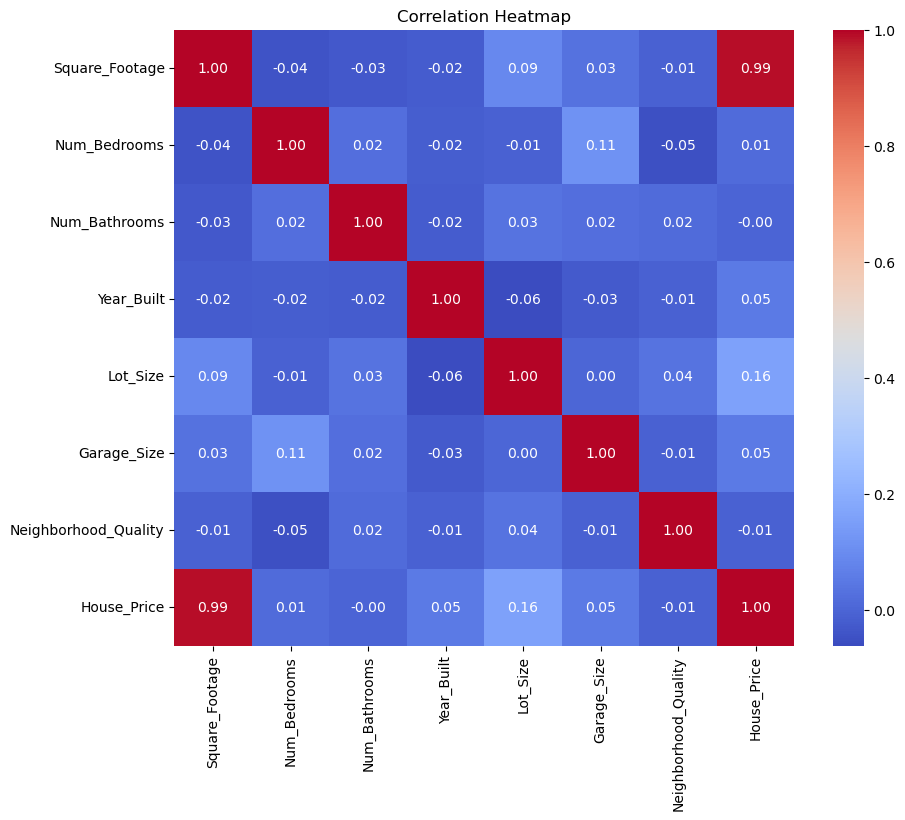

In [60]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

We observe a strong positive correlation between the Square_Footage and House_Price (0.99) showing us that Square_Footage is an important feature and a key predictor in determining the house prices.